In [1]:
# Set project directory
import os
import sys

def project_dir():
    notebook_path = %pwd
    repo_name = "nsl_kdd"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)

pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

import time

from data_utils import load_train_test_data
from src.feature_extraction import Autoencoder

# Load data

In [3]:
(X_train, X_test, Y_train, Y_test), attack_classes = load_train_test_data(pwd=pwd, return_classes=True, standardize=True, norm=False, include_categorical=False)

In [4]:
X = np.vstack([X_train, X_test])
Y = np.vstack([Y_train, Y_test])
nsl_lables = np.argmax(Y[:], axis=1)

# Utils

In [5]:
def plot_history(history, title=None, ymax=None):
    plt.figure(figsize=(10, 7))
    
    X = np.arange(1, len(history['loss']) + 1)
    
    plt.plot(X, history['loss'], label='train')
    
    if ymax is not None:
        plt.ylim(0, ymax)

    plt.grid()
    plt.legend()
        
    plt.title(title)
    plt.show()

In [6]:
path = pwd + "/src/feature_extraction"

# Training

In [7]:
N_BOTTLENECK_LIST = [2, 4, 8, 16]

2
4642/4642 [==============================] - 8s 2ms/step - loss: 0.2226
Loss: 0.2226


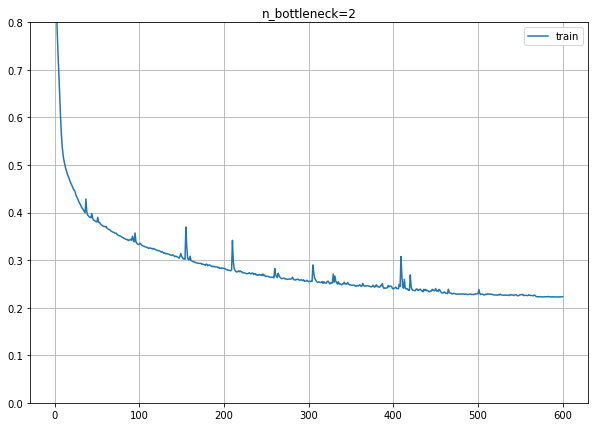

4
4642/4642 [==============================] - 8s 2ms/step - loss: 0.0616
Loss: 0.0616


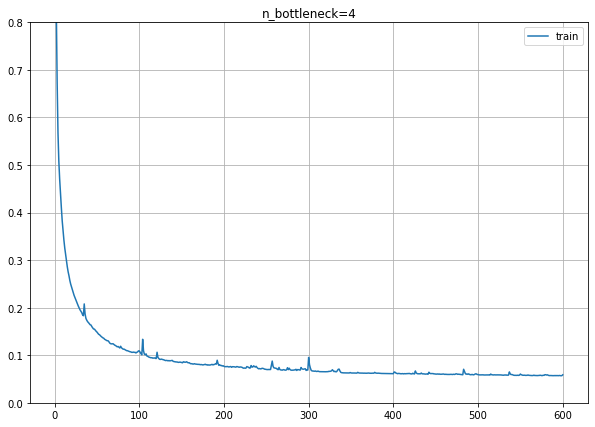

8
4642/4642 [==============================] - 8s 2ms/step - loss: 0.0253
Loss: 0.0253


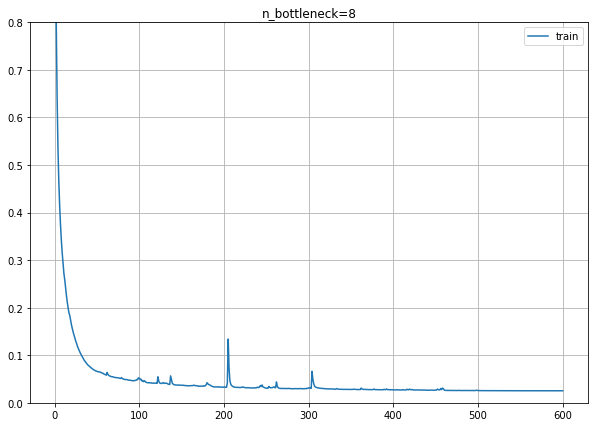

16
4642/4642 [==============================] - 8s 2ms/step - loss: 0.0083
Loss: 0.0083


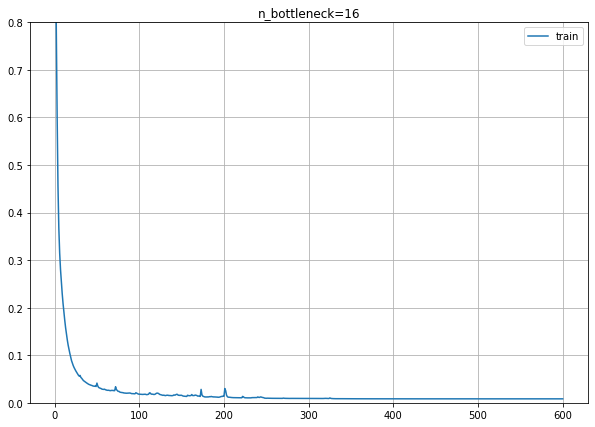

In [8]:
for n_bottleneck in N_BOTTLENECK_LIST:
    print('=============================================================================')
    print(n_bottleneck)
    print('=============================================================================')
    autoencoder = Autoencoder(n_bottleneck, root=path)
    
    # autoencoder.compile_and_train(X, n_epochs=600, lr=0.002, lr_patience=20, verbose=0)
    autoencoder.load_weights(load_history=True)
    
    print(f'Loss: {autoencoder.compile_and_evaluate(X):0.4f}')
    plot_history(autoencoder.history, f'n_bottleneck={n_bottleneck}', ymax=0.8)